In [211]:
import pandas as pd
import seaborn as see
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [212]:
hpaS =  pd.read_csv("E:\ML project\heart.csv")
hpaS.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [213]:
hpaS['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

<AxesSubplot:xlabel='output', ylabel='count'>

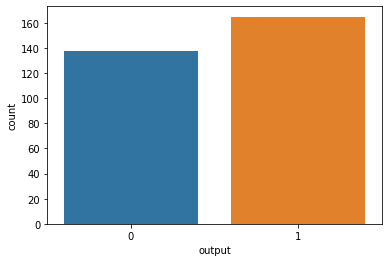

In [214]:
see.countplot(x='output', data = hpaS)

In [215]:
x = hpaS.drop('output', axis=1)
y = hpaS['output']

In [216]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, train_size=0.70, stratify=y,  random_state=40)

In [217]:
from sklearn.tree import DecisionTreeClassifier

In [218]:
hap_dt = DecisionTreeClassifier(splitter = 'random', criterion='entropy', max_depth=4)

In [219]:
hap_dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='random')

In [220]:
hap_dt.score(x_test, y_test)

0.8131868131868132

In [221]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
pred = hap_dt.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, pred))
print('Recall: ', recall_score(y_test, pred))
print('Precision: ', precision_score(y_test, pred))
print('F1-Score: ', f1_score(y_test, pred))

Accuracy:  0.8131868131868132
Recall:  0.84
Precision:  0.8235294117647058
F1-Score:  0.8316831683168315


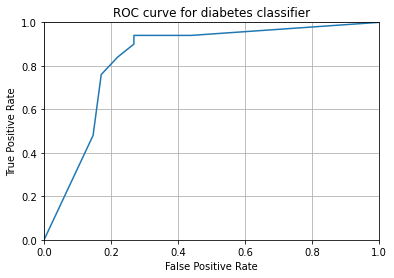

In [222]:
y_pred_prob = hap_dt.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [223]:
print("AUC Score:",roc_auc_score(y_test, y_pred_prob))

AUC Score: 0.8363414634146342


<AxesSubplot:>

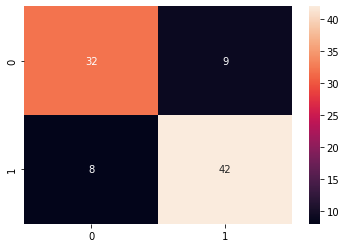

In [224]:
confusionM = confusion_matrix(y_test, pred)   
see.heatmap(confusionM, annot= True)  